In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf
import sys

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
#data = az.from_netcdf("ar_lnm_q.cdf")
data = az.from_netcdf("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_lnm_q.cdf")
az.summary(data,["ar_lnm_std",
                 "ar_lnm_tau",
                 "ar_q_std",
                 "ar_q_tau",
                 "nEff_inj_per_event",
                 "min_log_neff"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ar_lnm_std,1.163,0.176,0.784,1.487,0.011,0.008,132.0,493.0,1.74
ar_lnm_tau,0.959,0.446,0.238,1.670,0.020,0.014,35.0,404.0,1.78
ar_q_std,0.876,0.253,0.463,1.379,0.069,0.050,19.0,1002.0,1.24
ar_q_tau,1.227,1.355,0.119,3.088,0.231,0.164,21.0,512.0,1.28
nEff_inj_per_event,16.169,9.532,4.290,34.238,2.029,1.454,38.0,399.0,1.63
min_log_neff,0.927,0.329,0.347,1.643,0.040,0.038,169.0,280.0,1.65


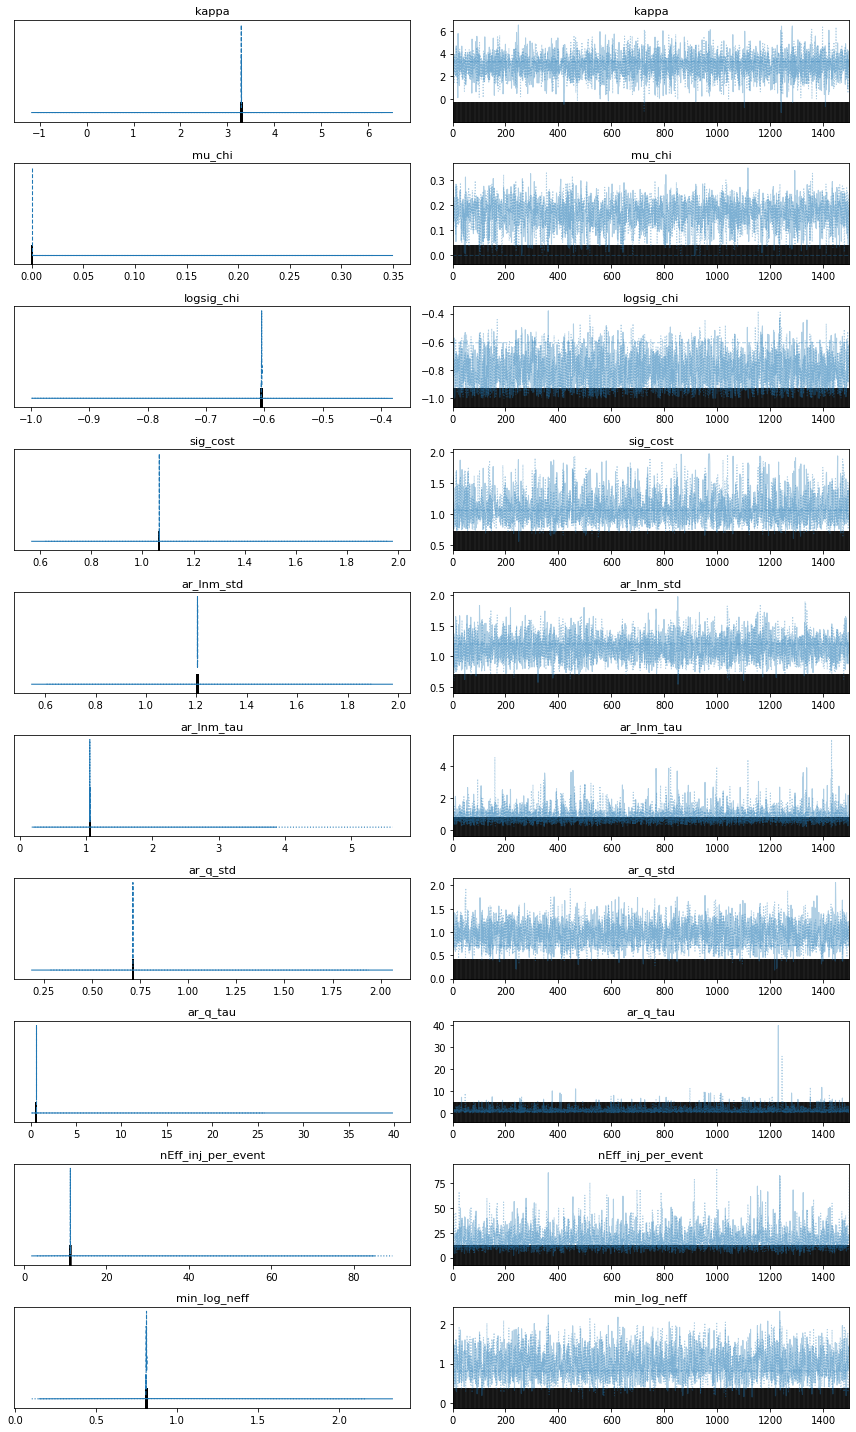

In [3]:
az.plot_trace(data,
              ["kappa",
               "mu_chi",
               "logsig_chi",
               "sig_cost",
               "ar_lnm_std",
               "ar_lnm_tau",
               "ar_q_std",
               "ar_q_tau",
               "nEff_inj_per_event","min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [4]:
#lnm_q_data = np.load('ar_lnm_q_data.npy',allow_pickle=True)[()]
lnm_q_data = np.load("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_lnm_q_data.npy",allow_pickle=True)[()]
m_values = np.exp(lnm_q_data['lnm_allSamples'])
q_values = lnm_q_data['q_allSamples']

In [5]:
samps = data.posterior.stack(draws=("chain", "draw"))
#samps = data.posterior.stack(draws=("draw",))

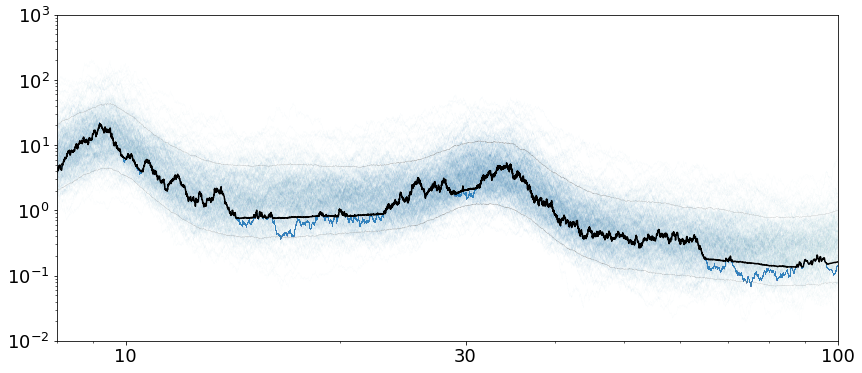

In [6]:
reduced_ms = m_values[::40]
reduced_f_lnms = samps['f_lnms'][::40]

p_ln_ms = np.zeros((reduced_ms.size,reduced_f_lnms.shape[1]))
for i in range(reduced_f_lnms.shape[1]):
    p_ln_ms[:,i] = reduced_f_lnms[:,i]

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(reduced_f_lnms.shape[1]),500)
for i in random_inds:
    ax.plot(reduced_ms,reduced_f_lnms[:,i],color='#3182bd',alpha=0.09,lw=0.09,zorder=0)

ax.plot(reduced_ms,np.median(p_ln_ms,axis=1),color='black')
ax.plot(reduced_ms,np.quantile(p_ln_ms,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_ms,np.quantile(p_ln_ms,0.95,axis=1),color='grey',lw=0.15)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-2,1e3)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

plt.show()

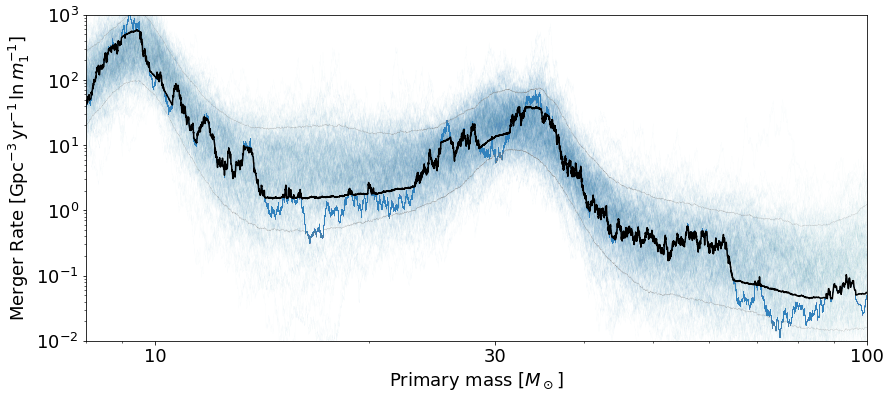

In [7]:
reduced_ms = m_values[::40]
reduced_f_lnms = samps['f_lnms'][::40]

p_ln_ms = np.zeros((reduced_ms.size,reduced_f_lnms.shape[1]))
for i in range(reduced_f_lnms.shape[1]):
    p_ln_ms[:,i] = samps.R20[i]*reduced_f_lnms[:,i]**2*samps['f_qs'][-1,i]

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(reduced_f_lnms.shape[1]),500)
for i in random_inds:
    ax.plot(reduced_ms,p_ln_ms[:,i],color='#3182bd',alpha=0.09,lw=0.09,zorder=0)

ax.plot(reduced_ms,np.median(p_ln_ms,axis=1),color='black')
ax.plot(reduced_ms,np.quantile(p_ln_ms,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_ms,np.quantile(p_ln_ms,0.95,axis=1),color='grey',lw=0.15)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-2,1e3)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

In [ ]:
reduced_qs = q_values[::30]
reduced_f_qs = samps['f_qs'][::30]

p_qs = np.zeros((reduced_qs.size,reduced_f_qs.shape[1]))
for i in range(reduced_f_qs.shape[1]):
    p_qs[:,i] = reduced_f_qs[:,i]

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(reduced_f_qs.shape[1]),500)
for i in random_inds:
    ax.plot(reduced_qs,reduced_f_qs[:,i],color='#3182bd',alpha=0.09,lw=0.09,zorder=0)

ax.plot(reduced_qs,np.median(p_qs,axis=1),color='black')
ax.plot(reduced_qs,np.quantile(p_qs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_qs,np.quantile(p_qs,0.95,axis=1),color='grey',lw=0.15)

ax.tick_params(labelsize=18)
ax.set_ylim(0,10)

plt.show()

In [ ]:
reduced_qs = q_values[::30]
reduced_f_qs = samps['f_qs'][::30]

p_qs = np.zeros((reduced_qs.size,reduced_f_qs.shape[1]))
for i in range(reduced_f_qs.shape[1]):
    p_qs[:,i] = reduced_f_qs[:,i]/np.trapz(reduced_f_qs[:,i],reduced_qs)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(reduced_f_qs.shape[1]),500)
for i in random_inds:
    ax.plot(reduced_qs,p_qs[:,i],color='#3182bd',alpha=0.09,lw=0.09,zorder=0)

ax.plot(reduced_qs,np.median(p_qs,axis=1),color='black')
ax.plot(reduced_qs,np.quantile(p_qs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_qs,np.quantile(p_qs,0.95,axis=1),color='grey',lw=0.15)

ax.tick_params(labelsize=18)
ax.set_ylim(0,10)

plt.show()

In [ ]:
reduced_qs = q_values[::30]
reduced_f_qs = samps['f_qs'][::30]

p_qs = np.zeros((reduced_qs.size,reduced_f_qs.shape[1]))
for i in range(reduced_f_qs.shape[1]):
    p_qs[:,i] = reduced_f_qs[:,i]

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(reduced_f_qs.shape[1]),500)
for i in random_inds:
    ax.plot(reduced_qs,reduced_f_qs[:,i],color='#3182bd',alpha=0.09,lw=0.09,zorder=0)

ax.plot(reduced_qs,np.median(p_qs,axis=1),color='black')
ax.plot(reduced_qs,np.quantile(p_qs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_qs,np.quantile(p_qs,0.95,axis=1),color='grey',lw=0.15)

ax.tick_params(labelsize=18)
#ax.set_ylim(0,10)
ax.set_yscale('log')

plt.show()

In [ ]:
def gaussian(samples,mu,sigma,lowCutoff,highCutoff):
    
    """
    Function defining the probability density due to a truncated Gaussian
    """
    
    a = (lowCutoff-mu)/np.sqrt(2*sigma**2)
    b = (highCutoff-mu)/np.sqrt(2*sigma**2)
    norm = np.sqrt(sigma**2*np.pi/2)*(-erf(a) + erf(b))
    return np.exp(-(samples-mu)**2/(2.*sigma**2))/norm

fig,ax = plt.subplots()
grid = np.linspace(0,1,1000)
for i in range(samps.mu_chi.size):
    
    p_chi = gaussian(grid,samps.mu_chi.values[i],10.**samps.logsig_chi.values[i],-1,1)
    ax.plot(grid,p_chi,color='black',lw=0.1,alpha=0.1)
plt.show()

fig,ax = plt.subplots()
grid = np.linspace(-1,1,1000)
for i in range(samps.mu_chi.size):
    
    #p_cost = gaussian(grid,samps.mu_cost.values[i],samps.sig_cost.values[i],-1,1)
    p_cost = gaussian(grid,1.,samps.sig_cost.values[i],-1,1)

    ax.plot(grid,p_cost,color='black',lw=0.1,alpha=0.1)
plt.show()